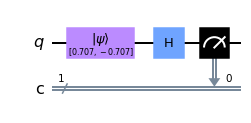

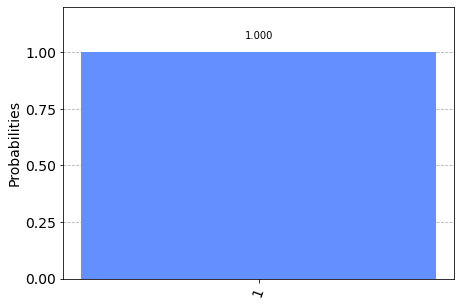

In [18]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.tools.visualization import plot_histogram
from math import sqrt, pi

# Creates the X measurement function (generally we measure in z basis)

sim = Aer.get_backend('aer_simulator')

def x_measurement(qc, qubit, cbit):
    '''Measure qubit in x basis and then put the result in cbit'''
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
#Initialize our qubit and measure it

qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0) # measure qubit 0 to classical bit 0
display(qc.draw())

qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [19]:
# Run P gate on widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

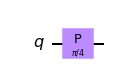

In [20]:
# Drawing a P-gate using p(phi, qubit)
qc = QuantumCircuit(1)
qc.p(pi/4,0)
qc.draw()

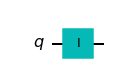

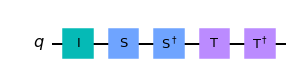

In [21]:
# I(Id-gate or Identity gate), S and T gate

# I-gate (Id-gate)
qc = QuantumCircuit(1)
qc.i(0)
display(qc.draw())

# S-gate (S-dagger, Sdg, sqrt(Z)^+) phi = pi/2
qc.s(0)
qc.sdg(0)
qc.draw()

# T-gate (phi = pi/4)
qc.t(0)
qc.tdg(0)
qc.draw()

In [22]:
# To see all the gate at once 
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

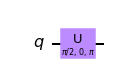

In [28]:
# U gate --> can define all the gate at once
# Lets have U-gate transform a |0> to |+> state

from qiskit import QuantumCircuit, assemble, Aer
from qiskit.tools.visualization import plot_histogram
from math import sqrt, pi


# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw()


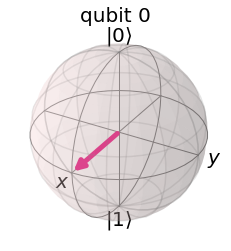

In [29]:
# Let's see the result
from qiskit.visualization import plot_bloch_multivector

qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [30]:
import qiskit.tools.jupyter
%qiskit_version_table

{'1': 501, '0': 523}


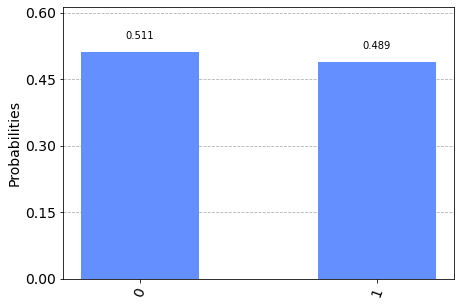

In [6]:
# Exercise 2
# Use Qiskit to display the probability of measuring  a |0> qubit in the states |+>  and |->
# If we want to measure |-> state then just change 0 state to 1 with x gate

from qiskit import QuantumCircuit, Aer 
from qiskit.tools.visualization import plot_histogram

qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure([0],[0])
qc.draw()

sim = Aer.get_backend('aer_simulator')
counts = sim.run(qc).result().get_counts()
print(counts)
plot_histogram(counts)